<a href="https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub?scriptVersionId=135172332" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа

ДОБРО ПОЖАЛОВАТЬ НА СТРАНИЦУ РЕЙТИНГОВ ГОЛУБЫХ ФИШЕК МОСКОВСКОЙ БИРЖИ ПО РУБЛЕВЫМ КУРСАМ И КОЭФФИЦИЕНТУ ШАРПА

Мы приветствуем вас на странице рейтингов голубых фишек Московской биржи, где представлена информация о их рублевых курсах и коэффициентах Шарпа. Наша страница предоставляет вам уникальную возможность оценить доходность и риск данных финансовых инструментов с помощью систематического анализа на основе различных временных промежутков.

В списке голубых фишек Мосбиржи вы найдете всего 20 бумаг, которые представляют собой высоколиквидные и стабильные активы на рынке. Наша страница предлагает вам рейтинги для разных временных периодов, включая месяц, квартал, полгода, год, 2 года, 3 года и 5 лет. Это позволяет вам оценить доходность и устойчивость данных бумаг на разных временных горизонтах.

Основным инструментом анализа на нашей странице являются столбчатые диаграммы, отображающие рейтинги бумаг по коэффициенту Шарпа рублевого курса. Данные в диаграммах упорядочены по убыванию коэффициента Шарпа, что позволяет вам быстро определить самые перспективные бумаги в контексте доходности и риска. Коды бумаг представлены на горизонтальной оси диаграмм, что облегчает навигацию и сопоставление данных.

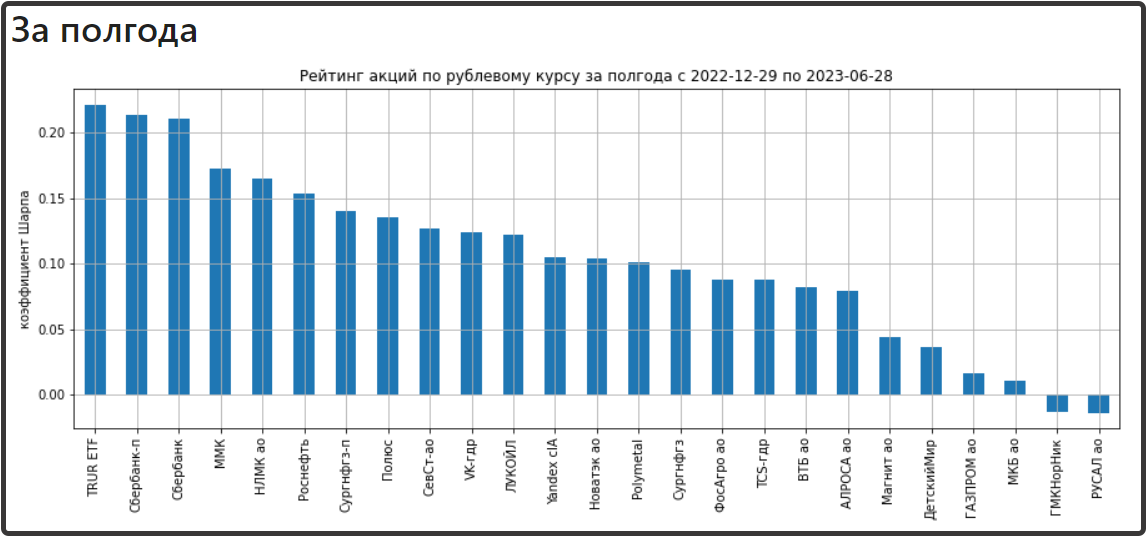

Коэффициент Шарпа считается как отношение средней дневной доходнсти к стандартному отклонению этой средней дневной доходности.

$$
coefSharp = \frac{mean(\frac{A_{i+1}-A_i}{A_i},i=start...end)}{std(\frac{A_{i+1}-A_i}{A_i},i=start...end)}
$$

Под диаграммами вы найдете подробную таблицу с информацией о самых выгодных и невыгодных бумагах, их категориях и соответствующих коэффициентах Шарпа. В таблице также предоставлены ссылки на страницы с графиками истории абсолютного и рублевого курса каждой бумаги, чтобы вы могли более детально изучить их доходность.

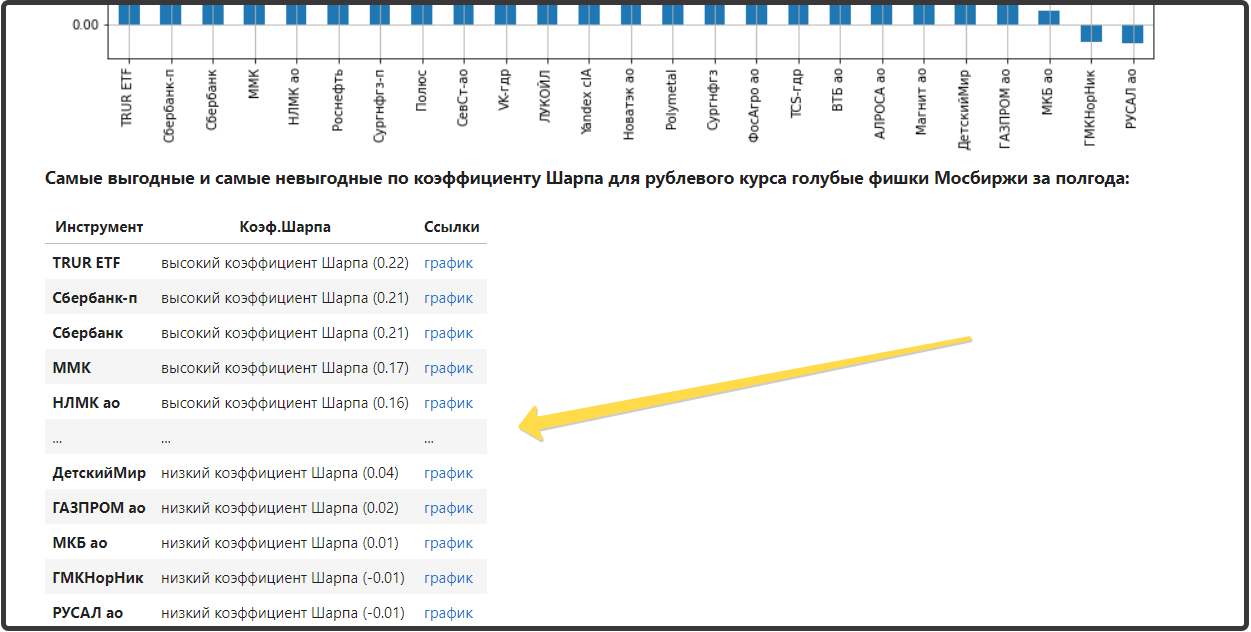

Для вашего удобства, под таблицей мы предлагаем ссылки на разделы проекта, соответствующие выбранным временным промежуткам. Таким образом, вы можете легко переходить между различными периодами и получать более полную картину рынка голубых фишек.

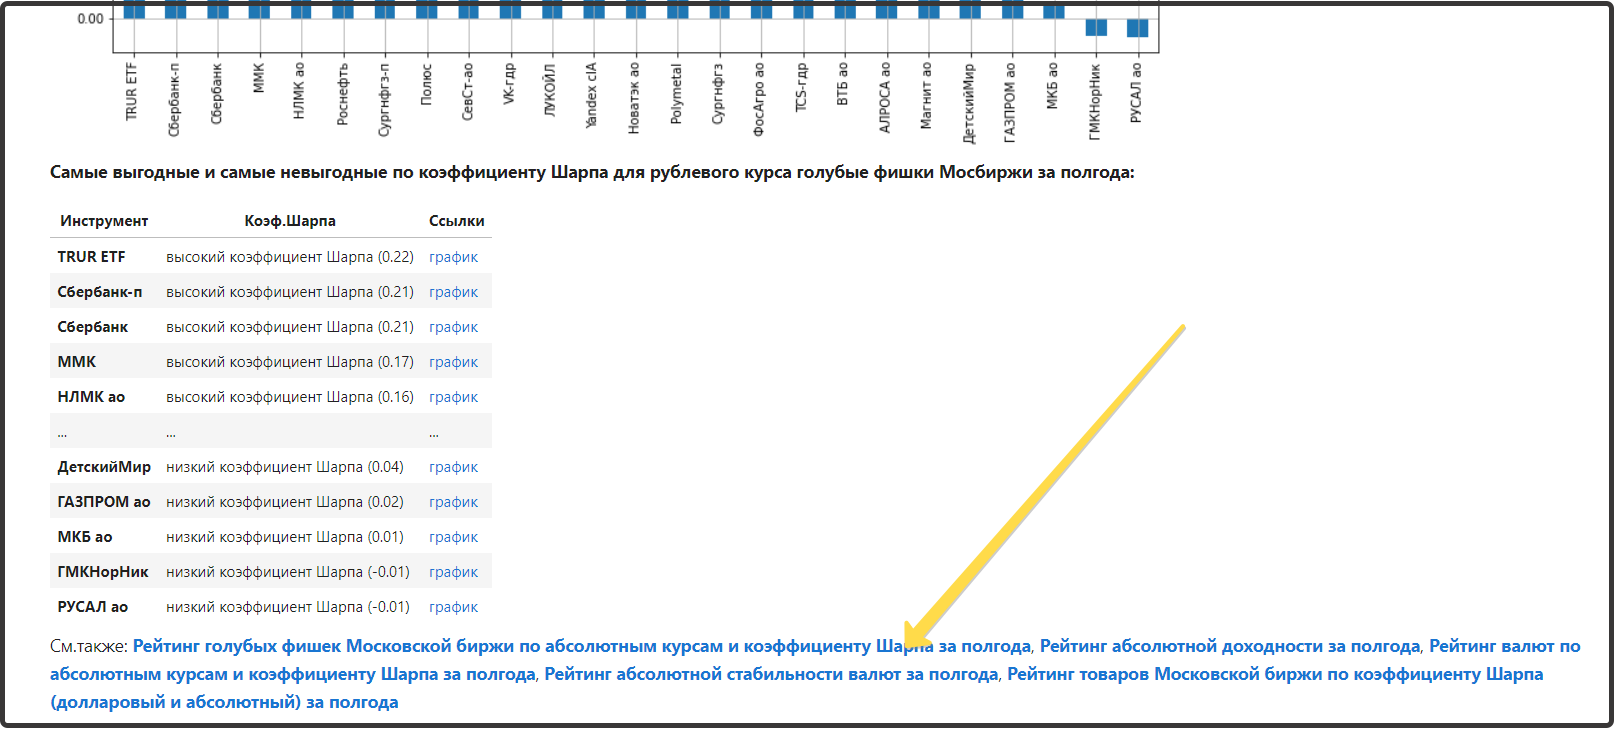

Для перемещения между бумагами вы можете воспользоваться правым боковым меню, которое обеспечивает интуитивно понятную навигацию и быстрый доступ к информации о каждой бумаге.

Мы надеемся, что наша страница с рейтингами голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа станет незаменимым инструментом для ваших инвестиционных решений. Наша команда всегда стремится предоставить вам точные и актуальные данные, чтобы помочь вам принимать обоснованные финансовые решения.

Если у вас возникнут вопросы или предложения, пожалуйста, не стесняйтесь связаться с нами. Мы готовы помочь и принять во внимание вашу обратную связь.

# Оглавление проекта "Абсолютный валютный курс" 

![Проект "Абсолютный валютный курс"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/@eavprog8/community) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/s/1826351-absolyutnyy-kurs-valyut) - 
[**Kaggle**](https://www.kaggle.com/code/eavprog/abscur-about)

## Абсолютные валютные курсы:
- [О проекте](https://www.kaggle.com/eavprog/abscur-about)
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Парные валютные курсы
- [Графики истории парных валютных курсов](https://www.kaggle.com/eavprog/abscur-par-hist)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц

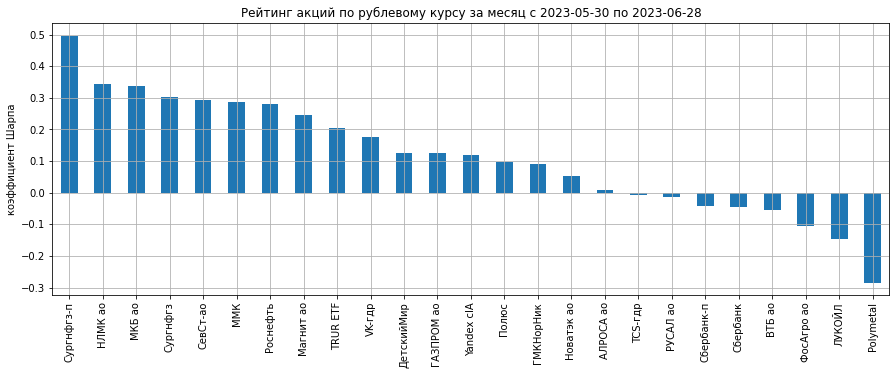

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за месяц:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**Сургнфгз-п**|высокий коэффициент Шарпа (0.5)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сургнфгз-п)|
|**НЛМК ао**|высокий коэффициент Шарпа (0.34)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#НЛМК-ао)|
|**МКБ ао**|высокий коэффициент Шарпа (0.34)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#МКБ-ао)|
|**Сургнфгз**|высокий коэффициент Шарпа (0.3)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сургнфгз)|
|**СевСт-ао**|высокий коэффициент Шарпа (0.29)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#СевСт-ао)|
|...|...|...|
|**Сбербанк**|низкий коэффициент Шарпа (-0.05)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк)|
|**ВТБ ао**|низкий коэффициент Шарпа (-0.06)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ВТБ-ао)|
|**ФосАгро ао**|низкий коэффициент Шарпа (-0.11)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**ЛУКОЙЛ**|низкий коэффициент Шарпа (-0.15)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ЛУКОЙЛ)|
|**Polymetal**|низкий коэффициент Шарпа (-0.28)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-месяц), [**Рейтинг абсолютной доходности за месяц**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-месяц), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-месяц), [**Рейтинг абсолютной стабильности валют за месяц**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-месяц), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за месяц**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-месяц)

# За квартал

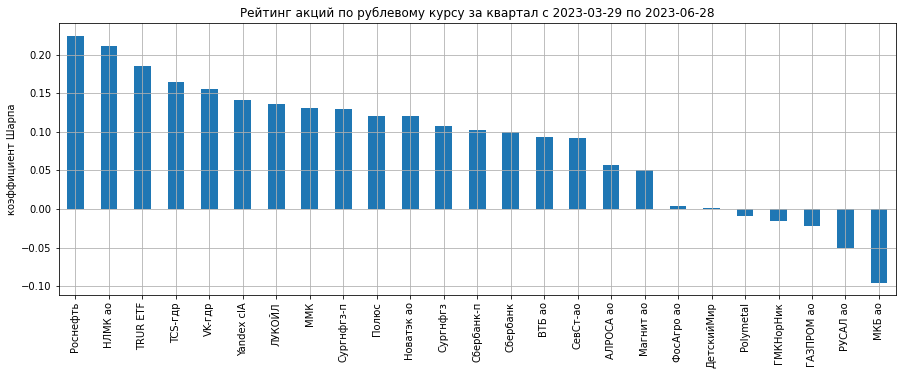

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за квартал:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**Роснефть**|высокий коэффициент Шарпа (0.22)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|**НЛМК ао**|высокий коэффициент Шарпа (0.21)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#НЛМК-ао)|
|**TRUR ETF**|высокий коэффициент Шарпа (0.19)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**TCS-гдр**|высокий коэффициент Шарпа (0.16)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TCS-гдр)|
|**VK-гдр**|высокий коэффициент Шарпа (0.16)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#VK-гдр)|
|...|...|...|
|**Polymetal**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|
|**ГМКНорНик**|низкий коэффициент Шарпа (-0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГМКНорНик)|
|**ГАЗПРОМ ао**|низкий коэффициент Шарпа (-0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГАЗПРОМ-ао)|
|**РУСАЛ ао**|низкий коэффициент Шарпа (-0.05)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#РУСАЛ-ао)|
|**МКБ ао**|низкий коэффициент Шарпа (-0.1)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#МКБ-ао)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-квартал), [**Рейтинг абсолютной доходности за квартал**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-квартал), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-квартал), [**Рейтинг абсолютной стабильности валют за квартал**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-квартал), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за квартал**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-квартал)

# За полгода

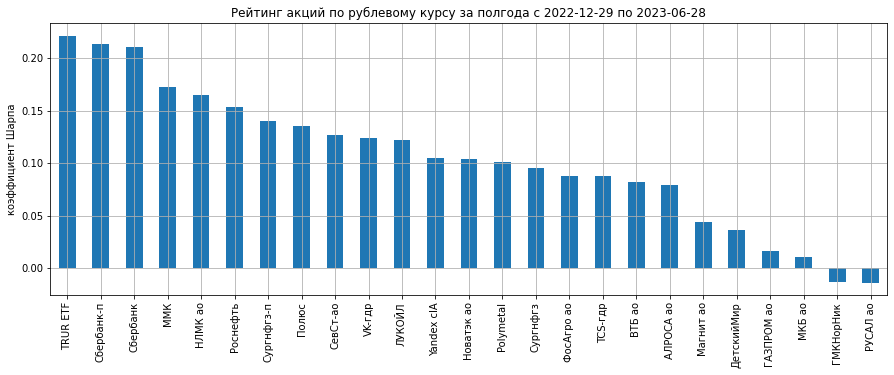

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за полгода:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**TRUR ETF**|высокий коэффициент Шарпа (0.22)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**Сбербанк-п**|высокий коэффициент Шарпа (0.21)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк-п)|
|**Сбербанк**|высокий коэффициент Шарпа (0.21)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк)|
|**ММК**|высокий коэффициент Шарпа (0.17)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ММК)|
|**НЛМК ао**|высокий коэффициент Шарпа (0.16)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#НЛМК-ао)|
|...|...|...|
|**ДетскийМир**|низкий коэффициент Шарпа (0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**ГАЗПРОМ ао**|низкий коэффициент Шарпа (0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГАЗПРОМ-ао)|
|**МКБ ао**|низкий коэффициент Шарпа (0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#МКБ-ао)|
|**ГМКНорНик**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГМКНорНик)|
|**РУСАЛ ао**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#РУСАЛ-ао)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-полгода), [**Рейтинг абсолютной доходности за полгода**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-полгода), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-полгода), [**Рейтинг абсолютной стабильности валют за полгода**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-полгода), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за полгода**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-полгода)

# За год

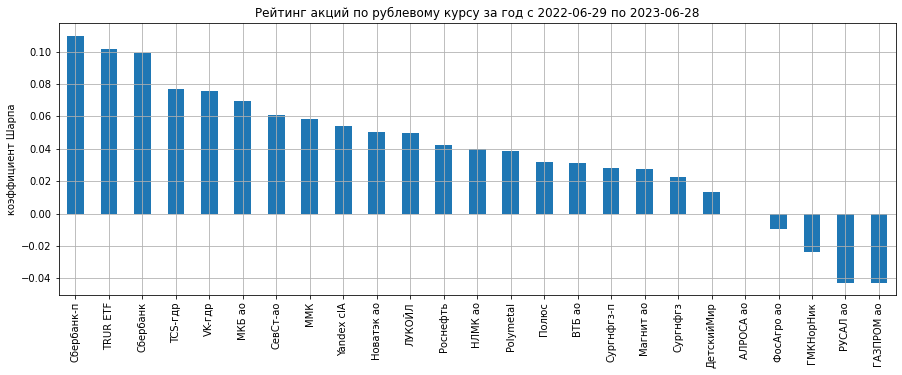

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за год:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**Сбербанк-п**|высокий коэффициент Шарпа (0.11)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк-п)|
|**TRUR ETF**|высокий коэффициент Шарпа (0.1)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**Сбербанк**|высокий коэффициент Шарпа (0.1)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк)|
|**TCS-гдр**|высокий коэффициент Шарпа (0.08)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TCS-гдр)|
|**VK-гдр**|высокий коэффициент Шарпа (0.08)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#VK-гдр)|
|...|...|...|
|**АЛРОСА ао**|низкий коэффициент Шарпа (-0.0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#АЛРОСА-ао)|
|**ФосАгро ао**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**ГМКНорНик**|низкий коэффициент Шарпа (-0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГМКНорНик)|
|**РУСАЛ ао**|низкий коэффициент Шарпа (-0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#РУСАЛ-ао)|
|**ГАЗПРОМ ао**|низкий коэффициент Шарпа (-0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГАЗПРОМ-ао)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-год), [**Рейтинг абсолютной доходности за год**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-год), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-год), [**Рейтинг абсолютной стабильности валют за год**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-год), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за год**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-год)

# За 2 года

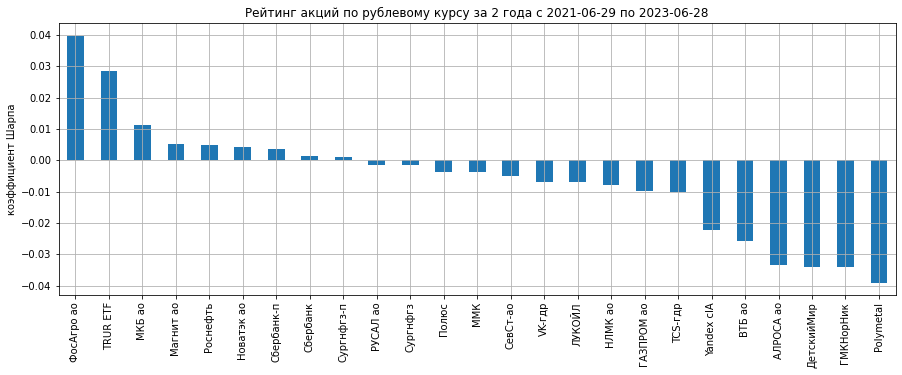

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за 2 года:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**ФосАгро ао**|высокий коэффициент Шарпа (0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**TRUR ETF**|высокий коэффициент Шарпа (0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**МКБ ао**|высокий коэффициент Шарпа (0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#МКБ-ао)|
|**Магнит ао**|высокий коэффициент Шарпа (0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Магнит-ао)|
|**Роснефть**|высокий коэффициент Шарпа (0.0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|...|...|...|
|**ВТБ ао**|низкий коэффициент Шарпа (-0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ВТБ-ао)|
|**АЛРОСА ао**|низкий коэффициент Шарпа (-0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#АЛРОСА-ао)|
|**ДетскийМир**|низкий коэффициент Шарпа (-0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**ГМКНорНик**|низкий коэффициент Шарпа (-0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГМКНорНик)|
|**Polymetal**|низкий коэффициент Шарпа (-0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-2-года), [**Рейтинг абсолютной доходности за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-2-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-2-года), [**Рейтинг абсолютной стабильности валют за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-2-года), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 2 года**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-2-года)

# За 3 года

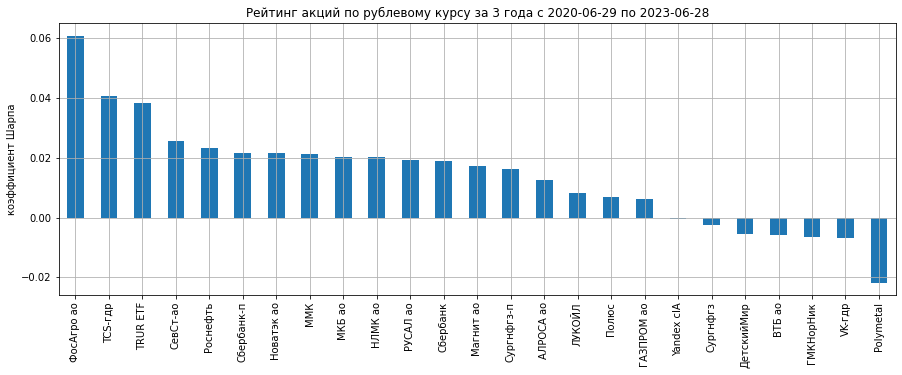

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за 3 года:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**ФосАгро ао**|высокий коэффициент Шарпа (0.06)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**TCS-гдр**|высокий коэффициент Шарпа (0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TCS-гдр)|
|**TRUR ETF**|высокий коэффициент Шарпа (0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**СевСт-ао**|высокий коэффициент Шарпа (0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#СевСт-ао)|
|**Роснефть**|высокий коэффициент Шарпа (0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|...|...|...|
|**ДетскийМир**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**ВТБ ао**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ВТБ-ао)|
|**ГМКНорНик**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГМКНорНик)|
|**VK-гдр**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#VK-гдр)|
|**Polymetal**|низкий коэффициент Шарпа (-0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-3-года), [**Рейтинг абсолютной доходности за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-3-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-3-года), [**Рейтинг абсолютной стабильности валют за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-3-года), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 3 года**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-3-года)

# За 5 лет

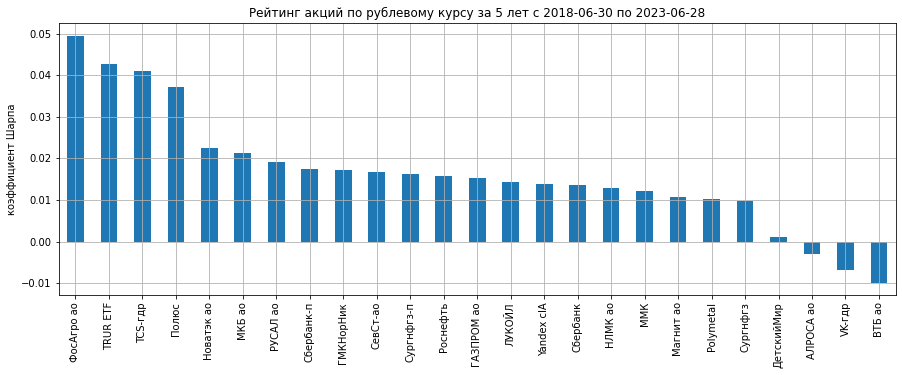

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за 5 лет:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**ФосАгро ао**|высокий коэффициент Шарпа (0.05)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**TRUR ETF**|высокий коэффициент Шарпа (0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**TCS-гдр**|высокий коэффициент Шарпа (0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TCS-гдр)|
|**Полюс**|высокий коэффициент Шарпа (0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Полюс)|
|**Новатэк ао**|высокий коэффициент Шарпа (0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Новатэк-ао)|
|...|...|...|
|**Сургнфгз**|низкий коэффициент Шарпа (0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сургнфгз)|
|**ДетскийМир**|низкий коэффициент Шарпа (0.0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**АЛРОСА ао**|низкий коэффициент Шарпа (-0.0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#АЛРОСА-ао)|
|**VK-гдр**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#VK-гдр)|
|**ВТБ ао**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ВТБ-ао)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-5-лет), [**Рейтинг абсолютной доходности за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-5-лет), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-5-лет), [**Рейтинг абсолютной стабильности валют за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-5-лет), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-5-лет)

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import abscur_menu

# меню проекта печатаем
abscur_menu.print_menu()

# рублевые курсы акций подкачиваем
s_rub = pd.read_csv("/kaggle/input/mmvb-blue-fishki/close_table.csv",index_col=0,parse_dates=['Dates'])

def elem_quant_text(elems,elem,texts):
    _end = "(" + str(np.round(elem*100,2)) + "%)"
    q_cnt = len(texts)
    
    for n in range(q_cnt):
        if elem <= elems.quantile((n+1)/q_cnt):
            return texts[q_cnt-n-1] + " " + _end

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

for per,title_per in diap:
    display(Markdown("# За "+title_per))
    
    date_start = s_rub.asfreq(freq="D").index[-per]
    date_finish = s_rub.index[-1]
    
    sharp_texts = "высокий коэффициент Шарпа\tсредний коэффициент Шарпа\tнизкий коэффициент Шарпа".split("\t")
    res = (s_rub[s_rub.index >= date_start] / s_rub[s_rub.index >= date_start].median()).pct_change()
    res = res.mean()/res.std()
    
#     res = sharpe_ratio(s_rub[s_rub.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг акций по рублевому курсу за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    plt.show()
    
    text = "**Самые выгодные и самые невыгодные по коэффициенту Шарпа для рублевого курса голубые фишки Мосбиржи за " + title_per + ":**\n\n"
    text += "|Инструмент|Коэф.Шарпа|Ссылки|\n"
    text += "|-|-|-|\n"
    for n in range(5):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','') + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#" + ticker.replace(" ","-") + ")|\n"
    text += "|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','') + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#" + ticker.replace(" ","-") + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))